In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine, reflect=True)

C:\Users\q2the\AppData\Local\Temp\ipykernel_11764\396900087.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(autoload_with=engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

first_row = session.query(Station).first()
first_row.__dict__

second_row = session.query(measurement).first()
second_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28fa7829a20>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1}

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(desc(measurement.date)).first()
most_recent_date


('2017-08-23',)

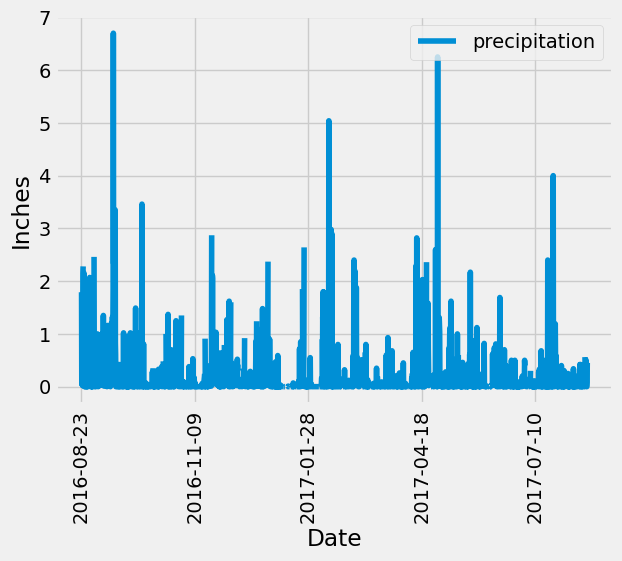

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
yearlong_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= dt.date(2016, 8, 23)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(yearlong_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper right')
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(Station).distinct().count()
print(number_stations)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(
    measurement.station, 
    func.count(measurement.station).label('count')
).group_by(
    measurement.station
).order_by(
    func.count(measurement.station).desc()
).all()

for location, count in station_counts:
    print(f"Location: {location}, Count: {count}")

Location: USC00519281, Count: 2772
Location: USC00519397, Count: 2724
Location: USC00513117, Count: 2709
Location: USC00519523, Count: 2669
Location: USC00516128, Count: 2612
Location: USC00514830, Count: 2202
Location: USC00511918, Count: 1979
Location: USC00517948, Count: 1372
Location: USC00518838, Count: 511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').one()
                            
    
    
print(temps)

(54.0, 85.0, 71.66378066378067)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


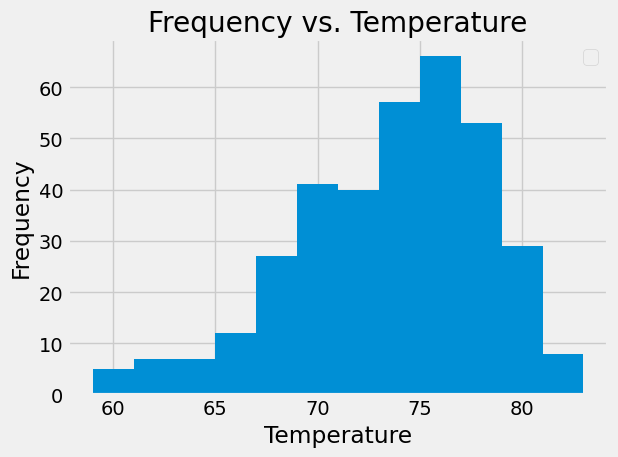

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(measurement.date, measurement.tobs).filter(measurement.date >= '2016-08-23').filter(measurement.station == 'USC00519281').all()
df = pd.DataFrame(station_data, columns=['date', 'tobs'])

df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency vs. Temperature')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()